In [1]:
# Hacer de nuevo tablas de estadisticos con las horas de picos de BM y LLJ
# Buscar definicion de CRMSD, agregar a descripcion de estadisticos
# hacer graficas de Taylor de niveles bajos y altos


In [2]:
import matplotlib.pyplot as plt 
#plt.rcParams['figure.figsize'] = [8.0, 8.0]
plt.rcParams['figure.dpi'] = 200
import numpy.ma as ma
import xarray as xr
import pandas as pd
import numpy as np
# ds083 GFS NAM
# p1s1 p2s2 p7s7

In [3]:
expruns = ['20120816_d03_gfs05_p1r1', '20120816_d03_gfs05_p1r3','20120816_d03_gfs05_p1r5',
           '20120816_d03_gfs05_p2r1', '20120816_d03_gfs05_p2r3','20120816_d03_gfs05_p2r5'
          '20120816_d03_gfs05_p1r1', '20120816_d03_gfs05_p1r3','20120816_d03_gfs05_p1r5',
           '20120816_d03_gfs05_p2r1', '20120816_d03_gfs05_p2r3','20120816_d03_']
expnames = ['g1r1', 'g1r3', 'g1r5', 'g2r1', 'g2r3', 'g2r5','n1r1', 'n1r3', 'n1r5', 'n2r1', 'n2r3', 'n2r5']
obsexpnames = ['OBS', 'g1r1', 'g1r3', 'g1r5', 'g2r1', 'g2r3', 'g2r5','n1r1', 'n1r3', 'n1r5', 'n2r1', 'n2r3', 'n2r5']

ids = [0,1,2,7,12,17,22,27,32,37,42,47]
levlabel = ['30m', '40m', '50m', '100m', '150m', '200m', '250m', '300m', '350m', '400m', '450m', '500m']
levs=[30,40,50,100,150,200,250,300,350,400,450,500]
levn=["30m","40m","50m","100m","150m","200m","250m","300m","350m","400m","450m","500m"]
t1, t2, t3, t4 = '2012-08-16 12:00', '2012-08-17 12:00', '2012-08-18 12:00', '2012-08-19 12:00'

expruns[1]

'20120816_d03_gfs05_p1r3'

In [4]:
# READ WRF INTERP DATA

g1r1 = xr.open_dataset('interp30/sodar_g1r1.nc')['uv30'].to_pandas()
g1r3 = xr.open_dataset('interp30/sodar_g1r3.nc')['uv30'].to_pandas()
g1r5 = xr.open_dataset('interp30/sodar_g1r5.nc')['uv30'].to_pandas()
g2r1 = xr.open_dataset('interp30/sodar_g2r1.nc')['uv30'].to_pandas()
g2r3 = xr.open_dataset('interp30/sodar_g2r3.nc')['uv30'].to_pandas()
g2r5 = xr.open_dataset('interp30/sodar_g2r5.nc')['uv30'].to_pandas()
n1r1 = xr.open_dataset('interp30/sodar_n1r1.nc')['uv30'].to_pandas()
n1r3 = xr.open_dataset('interp30/sodar_n1r3.nc')['uv30'].to_pandas()
n1r5 = xr.open_dataset('interp30/sodar_n1r5.nc')['uv30'].to_pandas()
n2r1 = xr.open_dataset('interp30/sodar_n2r1.nc')['uv30'].to_pandas()
n2r3 = xr.open_dataset('interp30/sodar_n2r3.nc')['uv30'].to_pandas()
n2r5 = xr.open_dataset('interp30/sodar_n2r5.nc')['uv30'].to_pandas()

drw1 = xr.open_dataset('interp30/sodar_g1r1.nc')['wd30'].to_pandas()
drw2 = xr.open_dataset('interp30/sodar_g1r3.nc')['wd30'].to_pandas()
drw3 = xr.open_dataset('interp30/sodar_g1r5.nc')['wd30'].to_pandas()
drw4 = xr.open_dataset('interp30/sodar_g2r1.nc')['wd30'].to_pandas()
drw5 = xr.open_dataset('interp30/sodar_g2r3.nc')['wd30'].to_pandas()
drw6 = xr.open_dataset('interp30/sodar_g1r5.nc')['wd30'].to_pandas()

tvg1r1 = xr.open_dataset('interp30/sodar_g1r1.nc')['tv30'].to_pandas()
tvg1r3 = xr.open_dataset('interp30/sodar_g1r3.nc')['tv30'].to_pandas()
tvg1r5 = xr.open_dataset('interp30/sodar_g1r5.nc')['tv30'].to_pandas()
tvg2r1 = xr.open_dataset('interp30/sodar_g2r1.nc')['tv30'].to_pandas()
tvg2r3 = xr.open_dataset('interp30/sodar_g2r3.nc')['tv30'].to_pandas()
tvg2r5 = xr.open_dataset('interp30/sodar_g2r5.nc')['tv30'].to_pandas()
tvn1r1 = xr.open_dataset('interp30/sodar_n1r1.nc')['tv30'].to_pandas()
tvn1r3 = xr.open_dataset('interp30/sodar_n1r3.nc')['tv30'].to_pandas()
tvn1r5 = xr.open_dataset('interp30/sodar_n1r5.nc')['tv30'].to_pandas()
tvn2r1 = xr.open_dataset('interp30/sodar_n2r1.nc')['tv30'].to_pandas()
tvn2r3 = xr.open_dataset('interp30/sodar_n2r3.nc')['tv30'].to_pandas()
tvn2r5 = xr.open_dataset('interp30/sodar_n2r5.nc')['tv30'].to_pandas()

sread_w =  pd.read_pickle('sodar_sp.pk')
sread_d =  pd.read_pickle('sodar_dd.pk')
sread_t =  pd.read_pickle('sodar_tv.pk')

sodarw =  sread_w.iloc[:,ids][t1:t4]
sodard =  sread_d.iloc[:,ids][t1:t4]
sodart =  sread_t.iloc[:,ids][t1:t4]


In [5]:
inds = np.append(np.arange(0,24),np.arange(49,72))
indl = np.append(np.arange(25,48),np.arange(73,97))

sea = sodarw.iloc[inds]
llj = sodarw.iloc[indl]

print(sea.shape, llj.shape, indl.shape, inds.shape)


(47, 12) (47, 12) (47,) (47,)


In [6]:
#for j in range(12):
#    lev = j
#    print(lev)
#    ######    LLJ    #####
#    #          time,lev
#    r = [llj.iloc[:,lev] for i in range(12)] 
#    validt = [list(np.where(~r[i].isnull())[0]) for i in range(12)]
#    ndim = len(validt[0])
#    print('valid data '+str(ndim))    
#    r = [llj.iloc[validt[i],lev] for i in range(12)] 
#    #          g1r1.iloc[indl,lev][validt]
#    p = [eval(expnames[i]+'.iloc[inds,lev][validt['+str(i)+']]') for i in range(12)] 
#    
#    pm = [np.mean(p[i]) for i in range(12)] 
#    rm = [np.mean(r[i]) for i in range(12)]
#    p_pm = [(p[i] - pm[i]) for i in range(12)]
#    r_rm = [(r[i] - rm[i]) for i in range(12)]
#    crmsd = [np.sqrt(np.average(np.square((p_pm[i]) - (r_rm[i])))) for i in range(12)]
#    sdevp = [np.std(p[i]) for i in range(12)]
#    sdevr = [np.std(r[i]) for i in range(12)]
#    #  ratio:  Case_Variance/Reference_Variance   ratio  = sqrt(tvar/rvar)
#    ratio = [np.sqrt(np.var(p[i]) / np.var(r[i])) for i in range(12)]
#    bias = [(np.average(p[i]) - np.average(r[i])) for i in range(12)]
#    sdev = [[sdevr[i], sdevp[i]] for i in range(12)];
#    ccoef =[ np.corrcoef(r[i], p[i])[1,0] for i in range(12)]
#    sdev = np.array(np.append(sdevr[0], sdevp))
#    crmsd = np.array(np.append(0, crmsd))
#    ccoef = np.array(np.append(1, ccoef))
#    bias = np.append(0,bias)
#    ratio = np.append(1,ratio)
#    #print(expnames[0], sdev[0], crmsd[0], ccoef[0])
#    #print(np.size(r[0]), np.size(p[0]))
#
#    ######    LOW LEVEL JET    #####
#    xnames=['LLJ_'+levlabel[lev]]+expnames
#    media = np.array(np.append(rm[0], pm))
#    import pandas as pd
#    pd.options.display.float_format = '{:.3f},'.format
#    print ('LLJ '+levlabel[lev])
#    pd.DataFrame([media,bias,sdev,ratio,ccoef], columns=xnames, index=['media','bias','sdev','ratio','ccoef'])
#    display(pd.DataFrame([media,ratio,ccoef,sdev,bias], columns=xnames, index=['media','ratio','ccoef','sdev','bias']))
#    data=pd.DataFrame([media,ratio,ccoef,sdev,bias], columns=xnames, index=['media','ratio','ccoef','sdev','bias'])
#    data.to_pickle(path=str(j)+'_file.pkl')
#rlljm = [[3.03], [2.52], [2.95], [3.86], [4.49], [4.88], [5.39], [5.41], [6.46], [6.93], [7.36], [7.21]]

In [7]:
np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})

levs, times = 11, 12

import numpy as np
llm = [0]*levs
nval = [0]*levs

b = np.zeros((levs,times))
r = np.zeros((levs,times))
rv= np.zeros((levs,times))
validt = np.zeros((levs,times))
p = np.zeros((levs,times))
pm = np.zeros((levs,times))
rm = np.zeros((levs,times))
ppm = np.zeros((levs,times))
rrm = np.zeros((levs,times))
crmsd = np.zeros((levs,times))
sdevp = np.zeros((levs,times))
sdevr = np.zeros((levs,times))
bias = np.zeros((levs,times))
sdev = np.zeros((levs,times))
ccoef = np.zeros((levs,times))
ratio = np.zeros((levs,times))
ratiov = np.zeros((levs,times))

for lev in range(levs):
    for t in range(times):
        r = [llj.iloc[:,lev] for i in range(times)] 
        validt = [list(np.where(~r[i].isnull())[0]) for i in range(times)]
        rv= [llj.iloc[validt[i],lev] for i in range(times)] 
        nval[lev] = len(validt[0])
        llm[lev] = (np.mean(rv))
        p = [eval(expnames[i]+'.iloc[indl,lev]') for i in range(times)] 
        pv= [eval(expnames[i]+'.iloc[indl,lev][validt['+str(i)+']]') for i in range(times)] 
        pm[lev][t] = np.nanmean(pv[t]) 
        rm[lev][t] = np.nanmean(rv[t])     
        b[lev][t]=np.mean( np.mean(pv[t]) )
        ppm = pv[lev] - pm[lev][t]
        rrm = rv[lev] - pm[lev][t]
        #crmsd = np.sqrt(np.average(np.square((ppm[t]) - (rrm[t])))) 
        sdevp[lev][t] = np.std(p[t])
        sdevr[lev][t] = np.std(r[t])
        bias[lev][t] = (np.average(pv[t]) - np.average(rv[t])) 
        ccoef[lev][t] = np.corrcoef(rv[t], pv[t])[1,0]
        varp = np.var(p[t])
        varr = np.var(r[t])
        varpv = np.var(pv[t])
        varrv = np.var(rv[t])
        #  ratio  = sqrt(tvar/rvar)
        ratio[lev][t] = np.sqrt(varp / varr)
        ratiov[lev][t] = np.sqrt(varpv / varrv)
        #ratio[lev][t] = np.sqrt(np.var(pv[t]) / np.var(rv[t]))
        

In [11]:
l1, l2 = 0, 11
x1, x2 = 0,6
print(expnames[x1:x2])
nval

['g1r1', 'g1r3', 'g1r5', 'g2r1', 'g2r3', 'g2r5']


[46, 47, 47, 47, 47, 47, 44, 45, 38, 29, 22]

In [12]:
for lev in range(l1,l2):
    sa = np.array2string(ccoef[lev,x1:x2], separator=',')[1:-1]
    print( ' ccorr_'+str(levn[lev])+' = (/', sa, '/)')

 ccorr_30m = (/ -0.20,0.10,-0.26,-0.21,-0.41,-0.05 /)
 ccorr_40m = (/ -0.30,0.13,-0.35,-0.26,-0.34,-0.16 /)
 ccorr_50m = (/ -0.29,0.13,-0.40,-0.22,-0.30,-0.15 /)
 ccorr_100m = (/ -0.24,0.46,-0.29,-0.08,0.07,-0.12 /)
 ccorr_150m = (/ -0.38,0.50,-0.29,-0.11,0.34,-0.11 /)
 ccorr_200m = (/ -0.59,0.51,-0.46,-0.24,0.48,-0.30 /)
 ccorr_250m = (/ -0.66,0.45,-0.61,-0.50,0.41,-0.56 /)
 ccorr_300m = (/ -0.56,0.46,-0.65,-0.64,0.37,-0.54 /)
 ccorr_350m = (/ -0.35,0.31,-0.40,-0.69,0.19,-0.51 /)
 ccorr_400m = (/ 0.22,0.23,0.13,-0.52,-0.04,-0.15 /)
 ccorr_450m = (/ 0.40,0.13,0.07,-0.43,-0.15,-0.22 /)


In [13]:
for lev in range(l1,l2):
    sa = np.array2string(ratio[lev,x1:x2], separator=', ')[1:-1]
    print( ' ratio_'+str(levn[lev])+' = (/', sa, '/)')

 ratio_30m = (/ 0.45, 0.51, 0.38, 0.58, 0.49, 0.54 /)
 ratio_40m = (/ 0.34, 0.40, 0.29, 0.44, 0.38, 0.42 /)
 ratio_50m = (/ 0.31, 0.38, 0.27, 0.40, 0.36, 0.40 /)
 ratio_100m = (/ 0.23, 0.35, 0.21, 0.28, 0.32, 0.29 /)
 ratio_150m = (/ 0.21, 0.39, 0.19, 0.25, 0.39, 0.24 /)
 ratio_200m = (/ 0.20, 0.42, 0.18, 0.25, 0.49, 0.22 /)
 ratio_250m = (/ 0.19, 0.41, 0.16, 0.23, 0.54, 0.22 /)
 ratio_300m = (/ 0.18, 0.39, 0.15, 0.25, 0.53, 0.22 /)
 ratio_350m = (/ 0.19, 0.35, 0.17, 0.29, 0.50, 0.24 /)
 ratio_400m = (/ 0.25, 0.37, 0.23, 0.38, 0.53, 0.34 /)
 ratio_450m = (/ 0.31, 0.42, 0.28, 0.44, 0.55, 0.41 /)


In [26]:
for lev in range(l1,l2):
    sa = np.array2string(ratiov[lev,x1:x2], separator=', ')[1:-1]
    print( ' ratiov_'+str(levn[lev])+' = (/', sa, '/)')

 ratiov_30m = (/ 0.48, 0.35, 0.41, 0.46, 0.56 /)
 ratiov_40m = (/ 0.37, 0.26, 0.30, 0.37, 0.43 /)
 ratiov_50m = (/ 0.35, 0.24, 0.27, 0.36, 0.39 /)
 ratiov_100m = (/ 0.30, 0.18, 0.21, 0.38, 0.30 /)
 ratiov_150m = (/ 0.32, 0.17, 0.21, 0.45, 0.29 /)
 ratiov_200m = (/ 0.30, 0.16, 0.22, 0.49, 0.27 /)
 ratiov_250m = (/ 0.27, 0.15, 0.21, 0.50, 0.25 /)
 ratiov_300m = (/ 0.23, 0.15, 0.17, 0.45, 0.21 /)
 ratiov_350m = (/ 0.21, 0.15, 0.17, 0.43, 0.22 /)
 ratiov_400m = (/ 0.20, 0.17, 0.21, 0.44, 0.20 /)
 ratiov_450m = (/ 0.21, 0.18, 0.22, 0.42, 0.24 /)


In [10]:
# Agregar la columna referencia a arreglo pm

llmeanr = np.array(llm).reshape(-1,1)
llmean = np.append(llmeanr,pm,axis=1)

llsdevr = sdevr[:,0].reshape(-1,1)
llsdev = np.append(llsdevr,sdevp,axis=1)

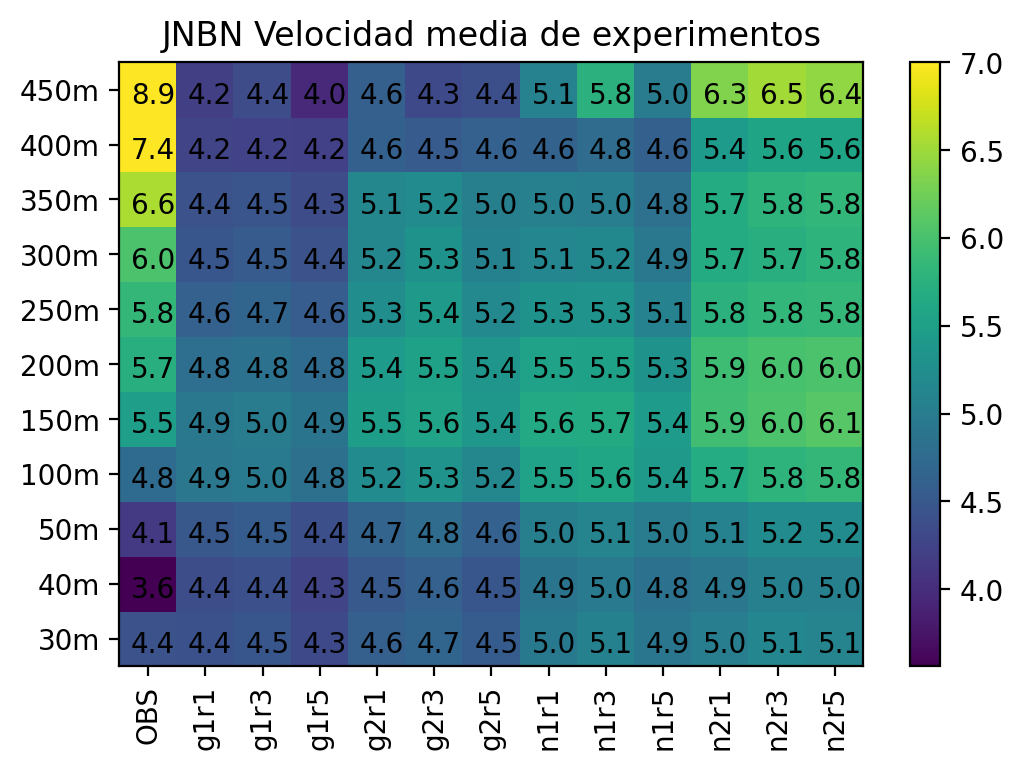

In [11]:
cmap = plt.get_cmap('viridis')

cb = plt.pcolormesh(llmean, cmap=cmap, vmax=7)
plt.title('JNBN Velocidad media de experimentos');
plt.colorbar(cb);

for x in range(13):
     for y in range(levs):
            plt.annotate('{0:.1f}'.format(llmean[y,x]), (x+0.2, y+0.25))
plt.xticks(0.5+np.arange(13), obsexpnames, rotation=90 );
plt.yticks(0.5+np.arange(levs), levlabel[:levs], rotation=0 );

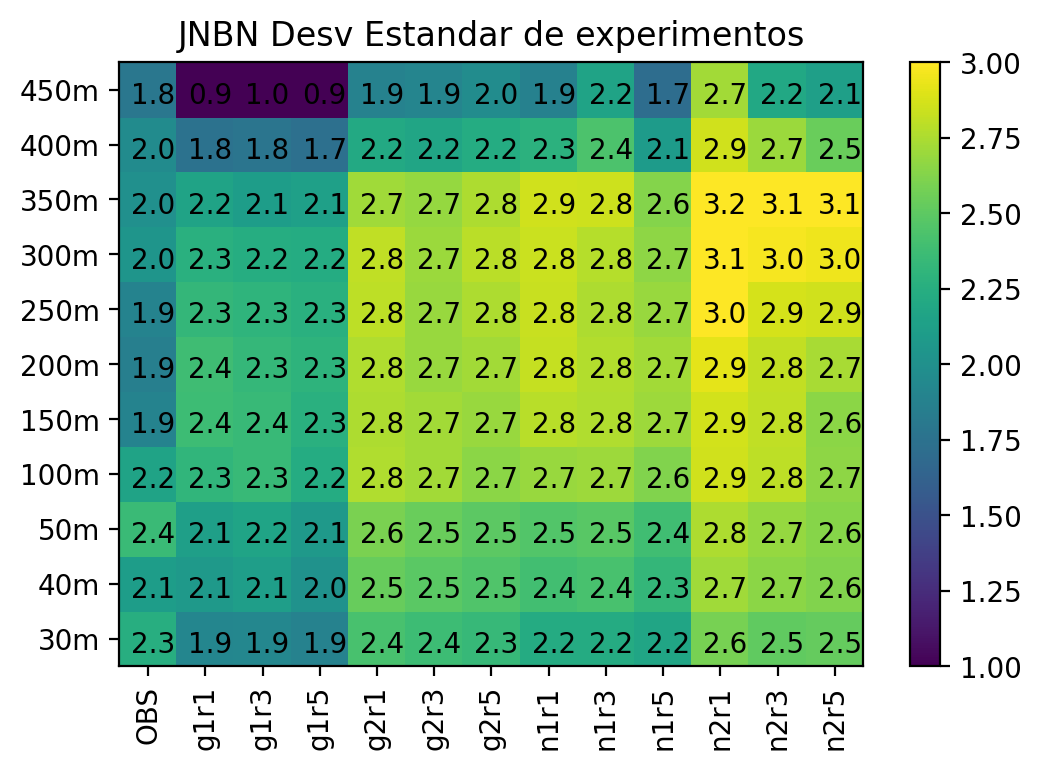

In [12]:
cb = plt.pcolormesh(llsdev, cmap=cmap, vmin=1, vmax=3)
plt.title('JNBN Desv Estandar de experimentos');
plt.colorbar(cb);

for x in range(13):
     for y in range(levs):
            plt.annotate('{0:.1f}'.format(llsdev[y,x]), (x+0.2, y+0.25))
plt.xticks(0.5+np.arange(13), obsexpnames, rotation=90 );
plt.yticks(0.5+np.arange(levs), levlabel[:levs], rotation=0 );

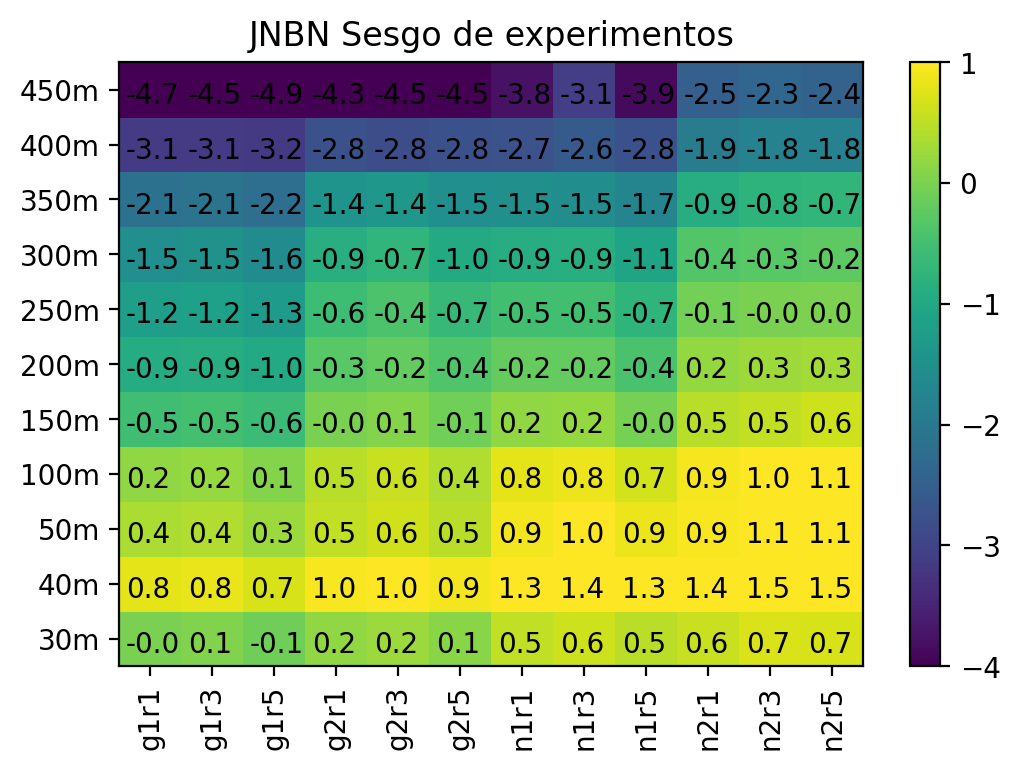

In [13]:
cb = plt.pcolormesh(bias, cmap=cmap, vmin=-4, vmax=1)
plt.title('JNBN Sesgo de experimentos');
plt.colorbar(cb);

for x in range(12):
     for y in range(levs):
            plt.annotate('{0:.1f}'.format(bias[y,x]), (x+0.1, y+0.25))
plt.xticks(0.5+np.arange(12), expnames, rotation=90 );
plt.yticks(0.5+np.arange(levs), levlabel[:levs], rotation=0 );

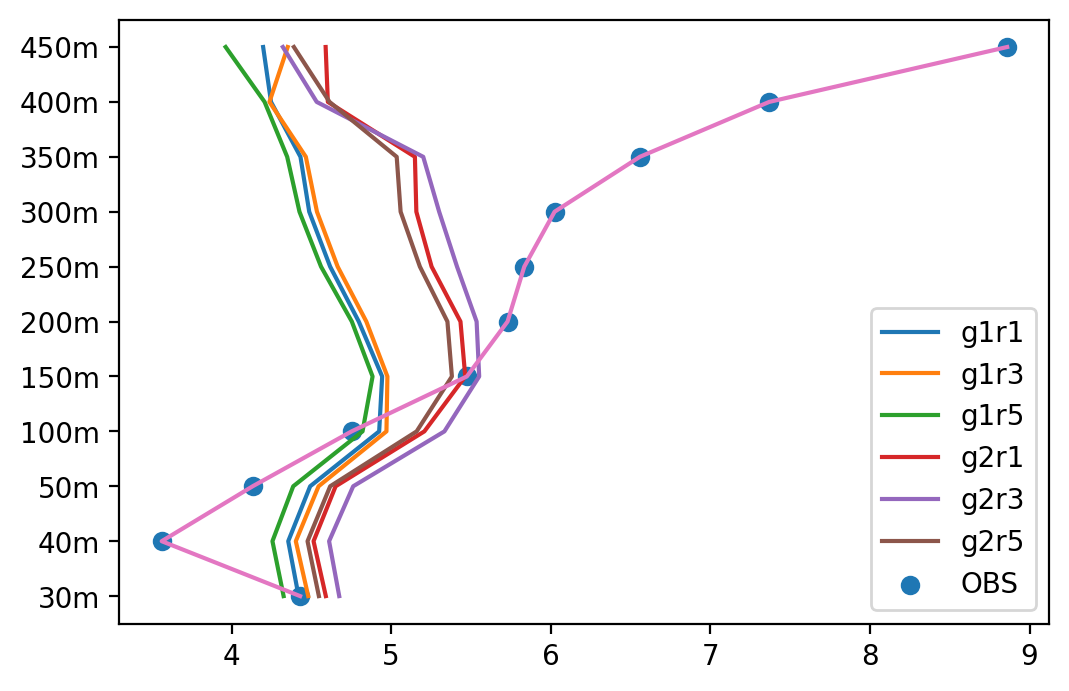

In [14]:
for i in range(6):
    plt.plot(pm[:,i], levlabel[:levs], label=expnames[i])  
plt.scatter(rm[:,0], levlabel[:levs], label='OBS')  
plt.plot(rm[:,0], levlabel[:levs])   
plt.legend()

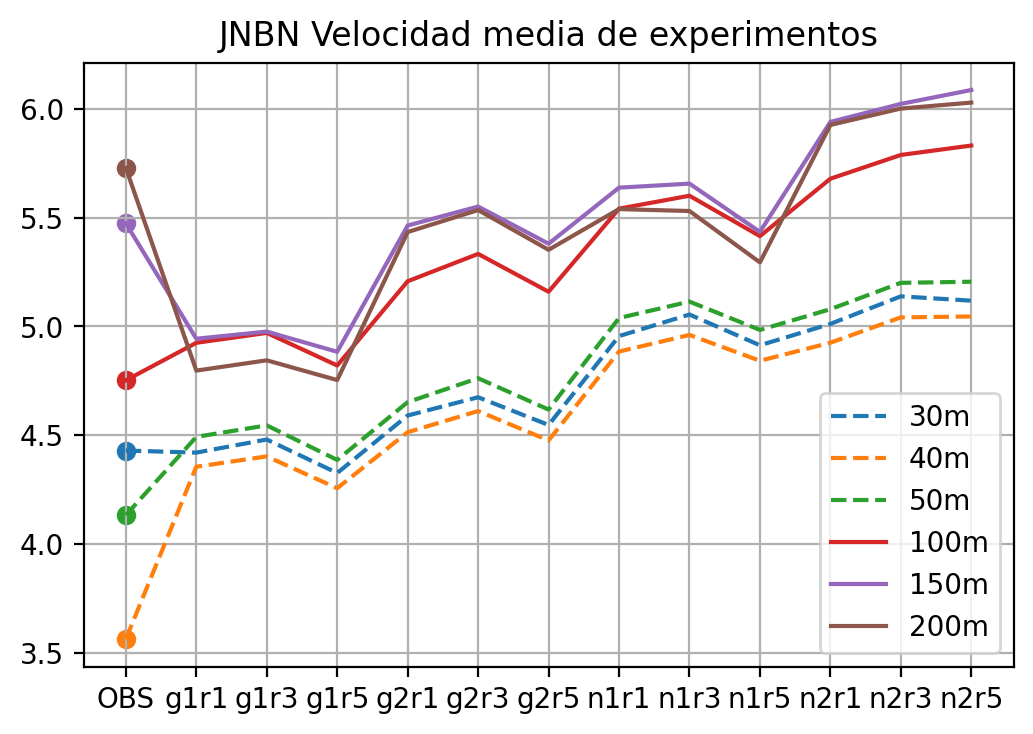

In [15]:
plt.title('JNBN Velocidad media de experimentos');
plt.plot(obsexpnames, np.concatenate(([rm[0,0]],pm[0,:])), label=levlabel[0], linestyle='--')
plt.plot(obsexpnames, np.concatenate(([rm[1,0]],pm[1,:])), label=levlabel[1], linestyle='--')
plt.plot(obsexpnames, np.concatenate(([rm[2,0]],pm[2,:])), label=levlabel[2], linestyle='--')
plt.plot(obsexpnames, np.concatenate(([rm[3,0]],pm[3,:])), label=levlabel[3])
plt.plot(obsexpnames, np.concatenate(([rm[4,0]],pm[4,:])), label=levlabel[4])
plt.plot(obsexpnames, np.concatenate(([rm[5,0]],pm[5,:])), label=levlabel[5])
plt.scatter(0, rm[0,0])
plt.scatter(0, rm[1,0])
plt.scatter(0, rm[2,0])
plt.scatter(0, rm[3,0])
plt.scatter(0, rm[4,0])
plt.scatter(0, rm[5,0])
plt.legend()
plt.grid()


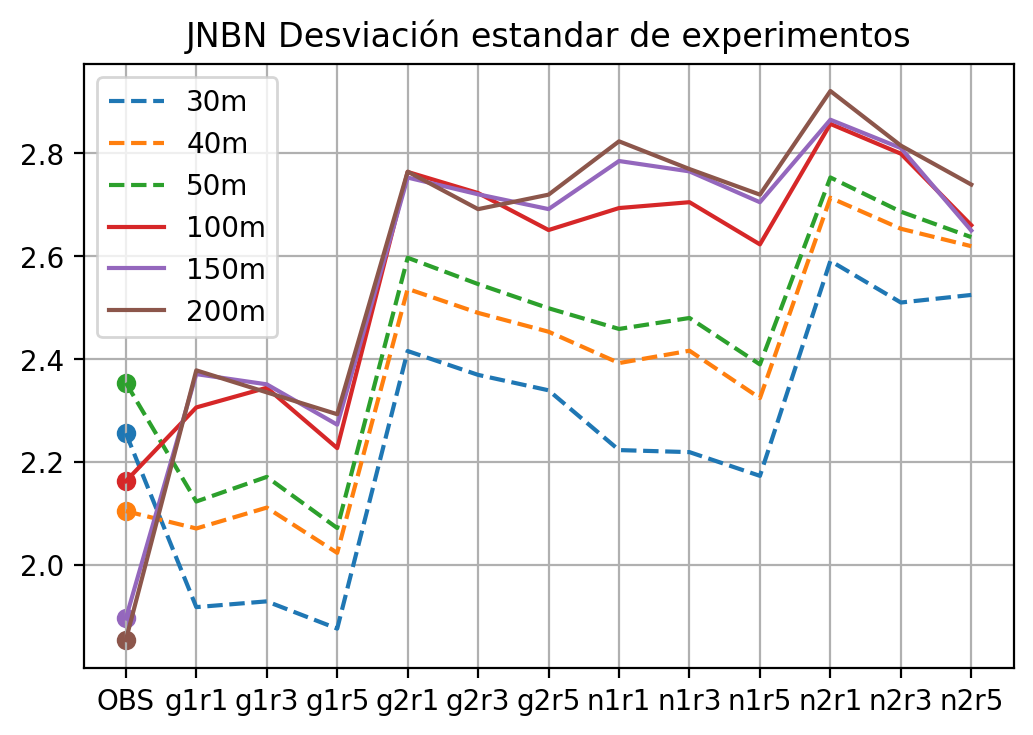

In [16]:
plt.title('JNBN Desviación estandar de experimentos');
plt.plot(obsexpnames, np.concatenate(([sdevr[0,0]],sdevp[0,:])), label=levlabel[0], linestyle='--')
plt.plot(obsexpnames, np.concatenate(([sdevr[1,0]],sdevp[1,:])), label=levlabel[1], linestyle='--')
plt.plot(obsexpnames, np.concatenate(([sdevr[2,0]],sdevp[2,:])), label=levlabel[2], linestyle='--')
plt.plot(obsexpnames, np.concatenate(([sdevr[3,0]],sdevp[3,:])), label=levlabel[3])
plt.plot(obsexpnames, np.concatenate(([sdevr[4,0]],sdevp[4,:])), label=levlabel[4])
plt.plot(obsexpnames, np.concatenate(([sdevr[5,0]],sdevp[5,:])), label=levlabel[5])
plt.scatter(0, sdevr[0,0])
plt.scatter(0, sdevr[1,0])
plt.scatter(0, sdevr[2,0])
plt.scatter(0, sdevr[3,0])
plt.scatter(0, sdevr[4,0])
plt.scatter(0, sdevr[5,0])
plt.legend()
plt.grid()


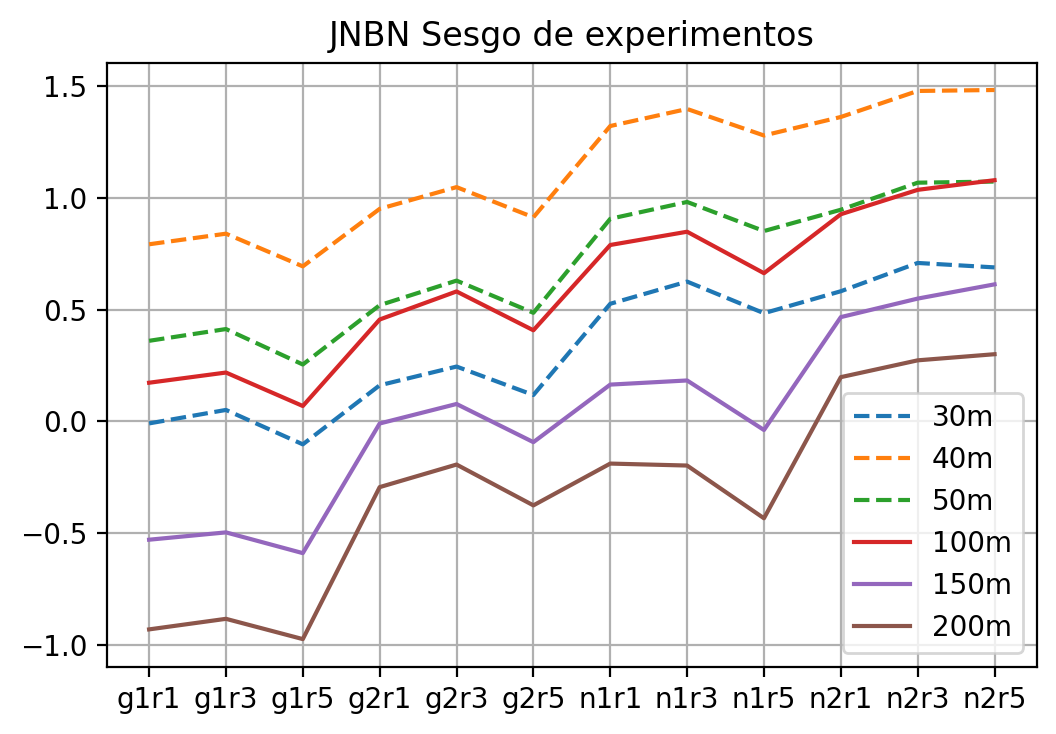

In [17]:
plt.title('JNBN Sesgo de experimentos');
plt.plot(expnames, bias[0,:], label=levlabel[0], linestyle='--')
plt.plot(expnames, bias[1,:], label=levlabel[1], linestyle='--')
plt.plot(expnames, bias[2,:], label=levlabel[2], linestyle='--')
plt.plot(expnames, bias[3,:], label=levlabel[3])
plt.plot(expnames, bias[4,:], label=levlabel[4])
plt.plot(expnames, bias[5,:], label=levlabel[5])

plt.legend()
plt.grid()